In [1]:
# Clustering Goal: To find out if there are subgroups among diabetics

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cleaned_diabetes.csv") # this path is generalized, please input original local file path here
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,192.13,33.6,0.627,50,1
1,1,85.0,66.0,29.00,55.17,26.6,0.351,31,0
2,8,183.0,64.0,17.70,228.77,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,203.84,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,26.53,190.15,30.1,0.349,47,1


In [4]:
#Since the goal is to identify the profile of patients diagnosed with diabetes, we will filter outcome = 1 first before doing clustering.
df_diabetic = df[df['Outcome'] == 1].copy()

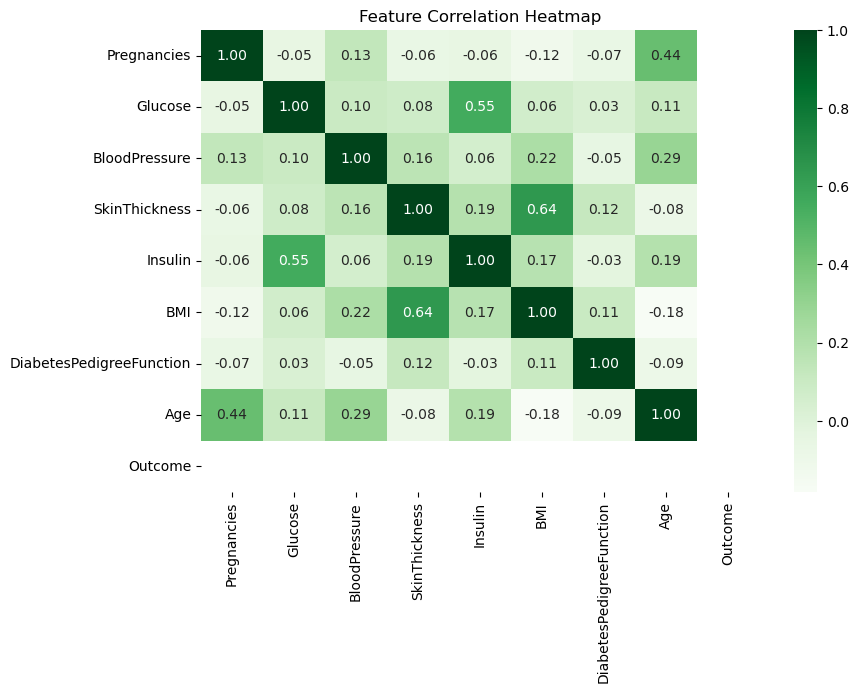

In [5]:
#To decide which continuous feature to use as inputs, use feature correlation matrix
correlation_matrix = df_diabetic.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show() 

In [6]:
# Pregnancies and Age are highly correlated. Pregnancies are only applicable for females and it increases with age, which may introduce bias in clustering, hence it should be removed.
# Glucose and Insulin are highly correlated, exclude both fields as high glucose and high insulin are directly related to diabetes.
# BloodPressure has low correlation with other fields, it should be kept as it can provide interesting insights
# SkinThickness and BMI are highly correlated, since both measures body fat, we will keep BMI as it has a higher correlation with outcome
# DPF has low correlation with other fields. It is also based on probability rather than an actual measure, which could distort clustering results, hence it should be removed.
    # E.g. Two people with the same Age, BMI, and BP but different DPF scores may be clustered differently, even if their current health profiles are the same.
# Outcome is the target variable and should not be included in the cluster analysis
# Hence, input fields are Age, BloodPressure, BMI. Glucose and Insulin will be used later on to validate cluster results.

In [7]:
clustering_criteria = ["BloodPressure", "BMI", "Age"]
data = df_diabetic[clustering_criteria]

In [8]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)
data_normalised

array([[0.56756757, 0.39122486, 0.59183673],
       [0.45945946, 0.01462523, 0.2244898 ],
       [0.13513514, 0.73857404, 0.24489796],
       [0.27027027, 0.29616088, 0.10204082],
       [0.54054054, 0.27787934, 0.65306122],
       [0.89189189, 0.34945023, 0.67346939],
       [0.59459459, 0.55210238, 0.26530612],
       [0.40540541, 0.26325411, 0.7755102 ],
       [0.56756757, 0.10603291, 0.6122449 ],
       [0.57304303, 0.25959781, 0.2244898 ],
       [0.72972973, 0.83729433, 0.20408163],
       [0.59459459, 0.24497258, 0.20408163],
       [0.54054054, 0.42778793, 0.2244898 ],
       [0.81081081, 0.6179159 , 0.40816327],
       [0.67567568, 0.22303473, 0.16326531],
       [0.86486486, 0.50091408, 0.6122449 ],
       [0.54054054, 0.29981718, 0.40816327],
       [0.62162162, 0.60329068, 0.44897959],
       [0.62162162, 0.31809872, 0.14285714],
       [0.62162162, 0.36563071, 0.51020408],
       [0.51351351, 0.55941499, 0.12244898],
       [0.56756757, 0.51919561, 0.71428571],
       [1.

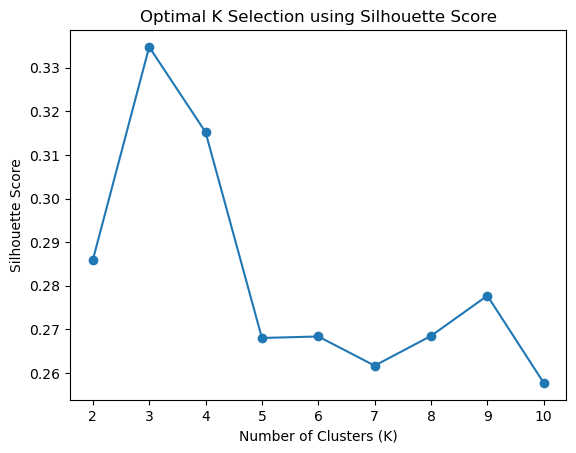

In [9]:
K_range = range(2, 11)
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_normalised)
    score = silhouette_score(data_normalised, labels)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Optimal K Selection using Silhouette Score')
plt.show()

In [10]:
model = KMeans(n_clusters=3, random_state=42)
labels = model.fit_predict(data_normalised)

In [11]:
centroids_normalised = model.cluster_centers_
centroids = scaler.inverse_transform(centroids_normalised)

centroids

array([[68.93148139, 32.12377124, 30.42241379],
       [79.05754682, 42.96363636, 34.09090909],
       [80.37333333, 32.13543285, 50.4       ]])

In [12]:
silhouette_score(data_normalised, labels)
# When all features are included, the optimal k is 3 and the silhouette score is 0.13, indicating weak clustering with significant overlaps. 
# After defining features to include, such as Age, BloodPressure, BMI, the optimal k is 3 and the silhouette score improved to 0.33, indicating moderate clustering, with some overlap but still meaningful.

0.33534264838052813

In [13]:
print(df.Outcome)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
df_diabetic['cluster'] = labels
df_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148.0,72.0,35.0,192.1300,33.6,0.627,50,1,2
2,8,183.0,64.0,17.7,228.7700,23.3,0.672,32,1,0
4,0,137.0,40.0,35.0,168.0000,43.1,2.288,33,1,1
6,3,78.0,50.0,32.0,88.0000,31.0,0.248,26,1,0
8,2,197.0,70.0,45.0,352.9225,30.5,0.158,53,1,2


In [15]:
# Exploring Cluster Profiles:

In [16]:
cluster0 = df_diabetic[df_diabetic['cluster'] == 0]
cluster1 = df_diabetic[df_diabetic['cluster'] == 1]
cluster2 = df_diabetic[df_diabetic['cluster'] == 2]

In [17]:
cluster0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0,116.0
mean,4.077586,138.586207,68.931481,29.481293,172.944526,32.123771,0.512147,30.422414,1.0,0.0
std,3.132303,29.967539,9.066617,7.207603,72.350264,3.390988,0.315235,5.733427,0.0,0.0
min,0.000000,78.000000,48.000000,12.000000,48.000000,22.900000,0.088000,21.000000,1.0,0.0
25%,2.000000,115.000000,64.000000,24.565000,120.730000,30.000000,0.258750,25.000000,1.0,0.0
50%,3.000000,131.500000,70.000000,29.790000,164.140000,32.400000,0.415000,30.000000,1.0,0.0
75%,6.250000,164.750000,74.000000,33.775000,208.282500,34.300000,0.713000,35.000000,1.0,0.0
max,14.000000,197.000000,98.000000,45.000000,352.922500,40.500000,1.391000,42.000000,1.0,0.0


In [18]:
cluster1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0
mean,4.506494,145.277578,79.057547,38.656688,211.249708,42.963636,0.630727,34.090909,1.0,1.0
std,4.232156,28.296150,12.333467,6.457477,81.047402,3.953917,0.469940,8.392010,0.0,0.0
min,0.000000,88.000000,30.000000,24.000000,14.000000,36.400000,0.127000,21.000000,1.0,1.0
25%,1.000000,126.000000,72.405184,35.040000,155.000000,39.500000,0.325000,26.000000,1.0,1.0
50%,4.000000,144.000000,78.000000,38.930000,213.810000,42.900000,0.502000,33.000000,1.0,1.0
75%,7.000000,170.000000,86.000000,42.000000,263.690000,45.600000,0.759000,41.000000,1.0,1.0
max,17.000000,199.000000,104.000000,54.512500,352.922500,50.250000,2.420000,54.000000,1.0,1.0


In [19]:
cluster2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.0,75.0
mean,6.453333,144.506667,80.373333,29.783500,206.886700,32.135433,0.527453,50.40000,1.0,2.0
std,3.632784,29.919881,10.115246,8.499176,77.577696,3.860058,0.330865,7.21485,0.0,0.0
min,0.000000,84.000000,60.000000,7.000000,29.000000,23.500000,0.121000,37.00000,1.0,2.0
25%,4.000000,124.500000,72.000000,24.915000,145.500000,29.800000,0.258500,45.00000,1.0,2.0
50%,7.000000,145.000000,80.000000,29.000000,190.150000,32.700000,0.443000,50.00000,1.0,2.0
75%,9.000000,164.500000,87.000000,33.000000,257.580000,35.000000,0.707000,54.00000,1.0,2.0
max,15.000000,197.000000,104.000000,54.512500,352.922500,39.200000,1.390000,70.00000,1.0,2.0


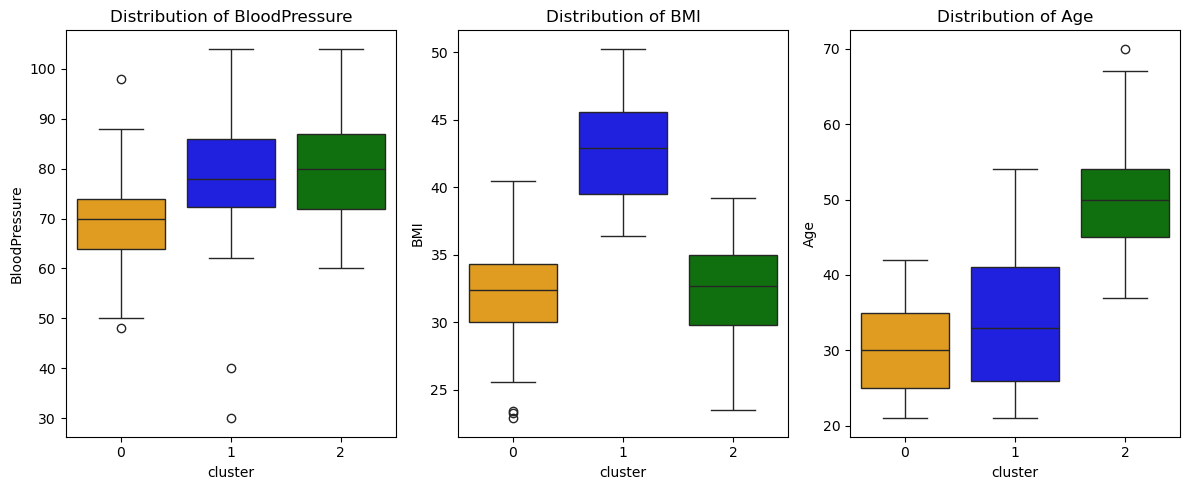

In [20]:
plt.figure(figsize=(12,5))

custom_palette = {'0': "orange", '1': "blue", '2': "green"}

plt.subplot(1, 3, 1)

sns.boxplot(x = 'cluster', y ='BloodPressure' , data=df_diabetic , palette=custom_palette)
plt.title('Distribution of BloodPressure')

plt.subplot(1, 3, 2)

sns.boxplot(x = 'cluster', y ='BMI' , data=df_diabetic , palette=custom_palette)
plt.title('Distribution of BMI')

plt.subplot(1, 3, 3)

sns.boxplot(x = 'cluster', y ='Age' , data=df_diabetic , palette=custom_palette)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

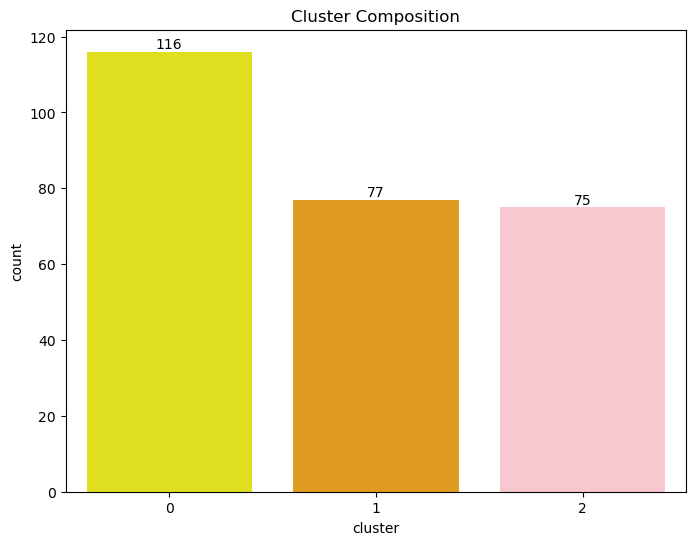

In [21]:
plt.figure(figsize=(8,6))
custom_palette = {'0': "yellow", '1': "orange", '2': "pink"}
ax = sns.countplot(data=df_diabetic, x='cluster', palette=custom_palette, legend='outcome')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cluster Composition')
plt.show()

In [22]:
df_diabetic.groupby('cluster').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min  25%  50%   75%   max   count   
cluster                                                                      
0             116.0  4.077586  3.132303  0.0  2.0  3.0  6.25  14.0   116.0   
1              77.0  4.506494  4.232156  0.0  1.0  4.0  7.00  17.0    77.0   
2              75.0  6.453333  3.632784  0.0  4.0  7.0  9.00  15.0    75.0   

                     ...   Age       Outcome                                \
               mean  ...   75%   max   count mean  std  min  25%  50%  75%   
cluster              ...                                                     
0        138.586207  ...  35.0  42.0   116.0  1.0  0.0  1.0  1.0  1.0  1.0   
1        145.277578  ...  41.0  54.0    77.0  1.0  0.0  1.0  1.0  1.0  1.0   
2        144.506667  ...  54.0  70.0    75.0  1.0  0.0  1.0  1.0  1.0  1.0   

              
         max  
cluster       
0        1.0  
1        1.0  
2        1.0  

[3 rows x 72 columns]

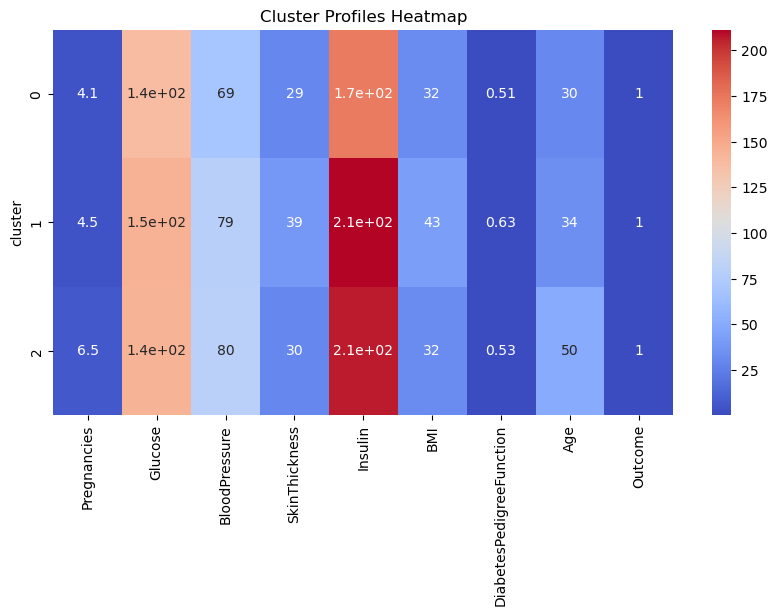

In [23]:
# Identifying prominent features in each cluster
plt.figure(figsize=(10, 5))
sns.heatmap(df_diabetic.groupby('cluster').mean(), annot=True, cmap='coolwarm')
plt.title('Cluster Profiles Heatmap')
plt.show()

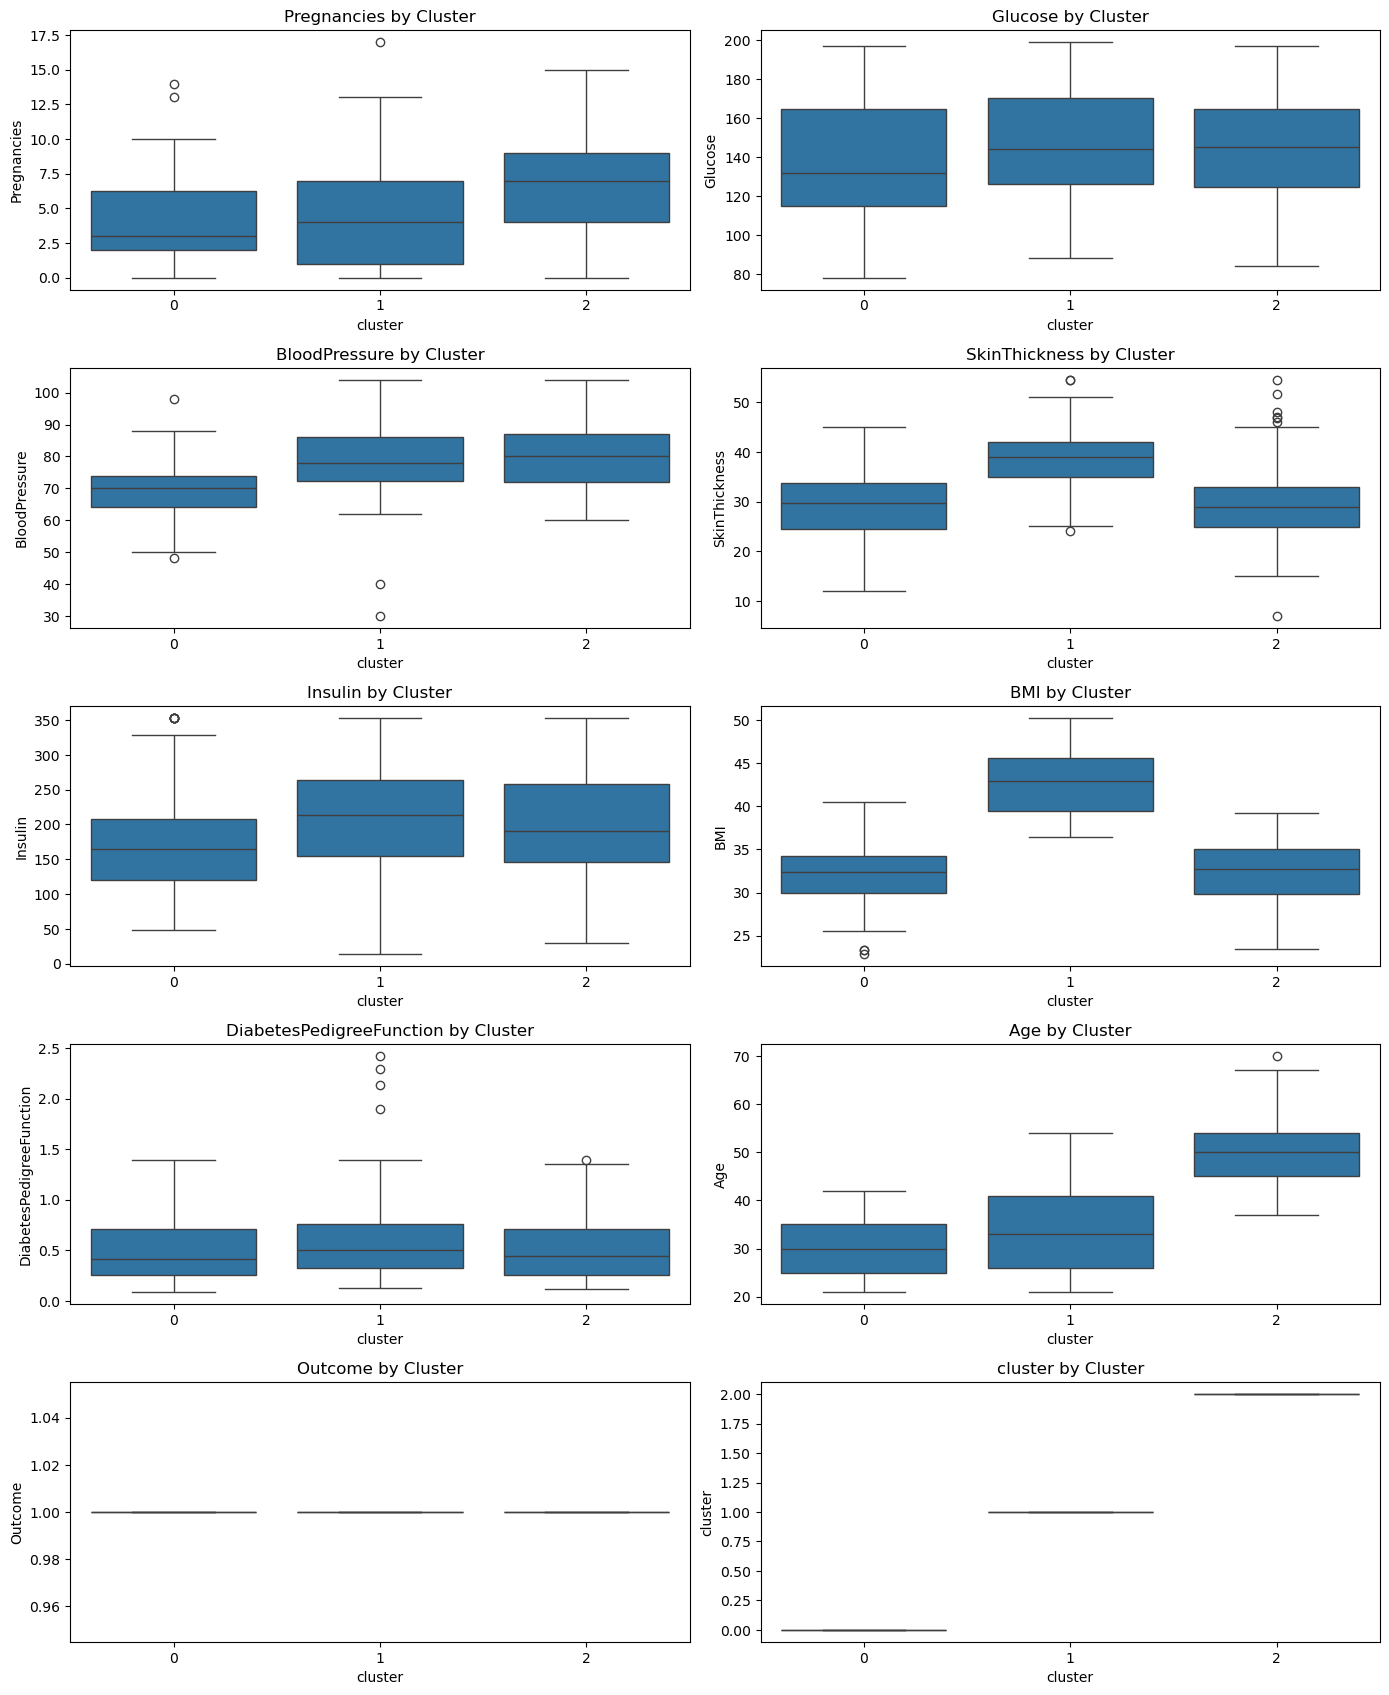

In [24]:
num_features = df_diabetic.columns  

# Set figure size for multiple subplots
plt.figure(figsize=(14, 20))

# Loop through features and create individual boxplots
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features) // 2 + 1, 2, i)  # Arrange plots in a grid (2 columns)
    sns.boxplot(data=df_diabetic, x='cluster', y=feature)
    plt.title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

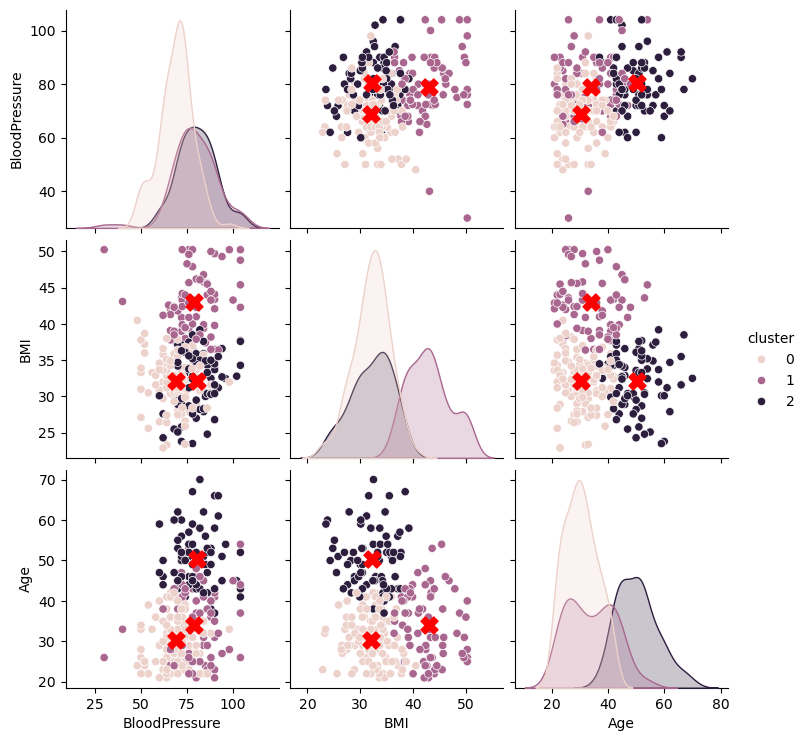

In [30]:
columns = ['BloodPressure', 'BMI', 'Age']

centroids = df_diabetic.groupby("cluster")[columns].mean()

pairplot = sns.pairplot(df_diabetic, vars=clustering_criteria, hue="cluster", diag_kind='kde')

for ax in pairplot.axes.flatten():
    if ax is not None:
        x_label = ax.get_xlabel()
        y_label = ax.get_ylabel()
        if x_label in clustering_criteria and y_label in clustering_criteria:  # Ensure it's a valid scatter plot
            for cluster, row in centroids.iterrows():
                ax.scatter(row[x_label], row[y_label], s=150, c='red', marker='X', label=f'Centroid {cluster}')
                
plt.show()

In [32]:
# Analyzing pair plots:
# Cohesion
    # Clusters are grouped close together, especially BMI and Age. This suggests that the clusters are cohesive.
# Separation
    # The three clusters are well-separated. Each group have their distinctive traits, such as factors relating to age and obesity level.
# Parsimony
    # The three clusters capture the risk-groups of diabetes well, splitting them into categories such as age-related diabetes and obesity-driven diabetes.

In [33]:
df_diabetic.groupby('cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
cluster,,,,,,,,,
0,4.077586,138.586207,68.931481,29.481293,172.944526,32.123771,0.512147,30.422414,1.0
1,4.506494,145.277578,79.057547,38.656688,211.249708,42.963636,0.630727,34.090909,1.0
2,6.453333,144.506667,80.373333,29.783500,206.886700,32.135433,0.527453,50.400000,1.0


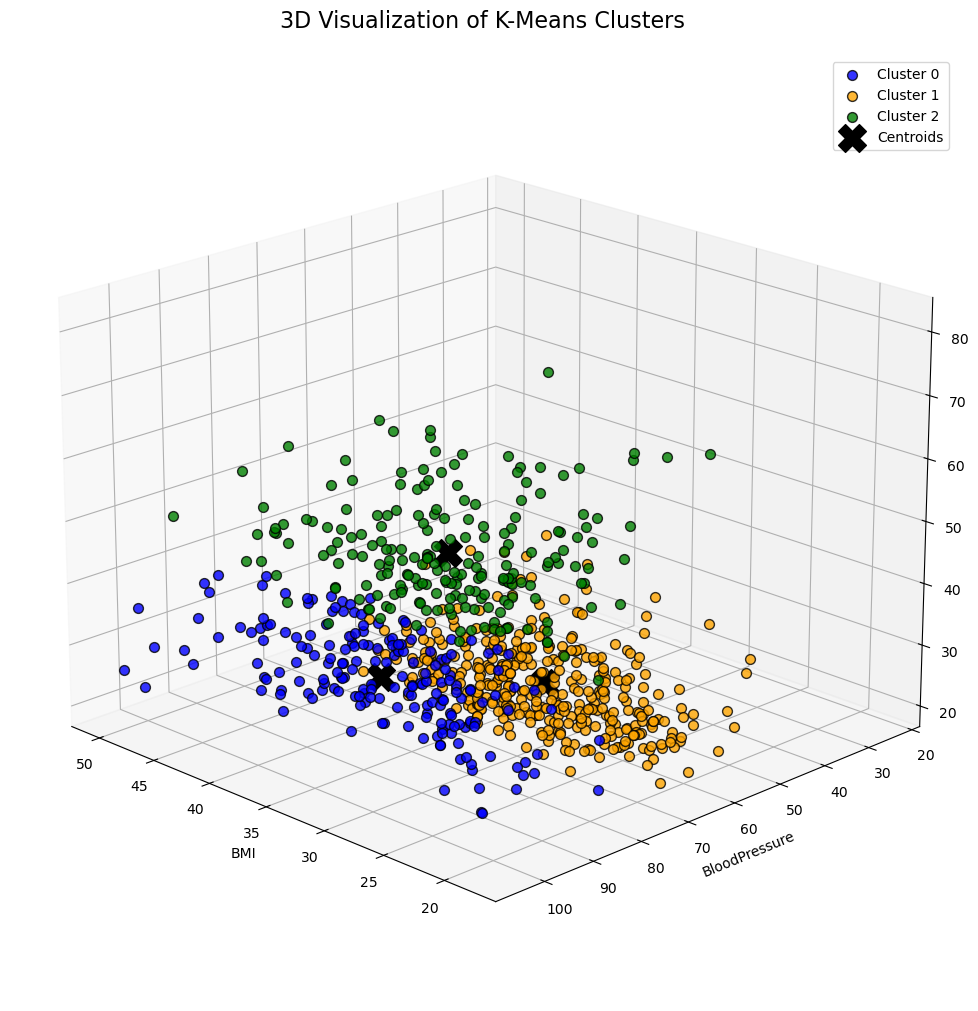

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load data and select features
X = df[['BMI', 'BloodPressure', 'Age']].values  

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Extract Cluster Centers
centers = kmeans.cluster_centers_

# Create figure with constrained layout
fig = plt.figure(figsize=(14,10), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

# Define distinct colors
colors = ['blue', 'orange', 'green']

# 1. Plot clusters
for i in range(3):
    ax.scatter(X[labels == i, 0], 
               X[labels == i, 1], 
               X[labels == i, 2],
               color=colors[i], 
               label=f'Cluster {i}', 
               alpha=0.8, 
               edgecolors='k', 
               s=50, 
               depthshade=False, 
               zorder=2)

# 2. Plot cluster centers
ax.scatter(centers[:, 0], 
           centers[:, 1], 
           centers[:, 2], 
           c='black', 
           marker='X', 
           s=400, 
           edgecolors='black', 
           alpha=1.0, 
           label='Centroids', 
           depthshade=False, 
           zorder=5)

# Set Axis Labels (with extra label padding on z-axis)
ax.set_xlabel("BMI")
ax.set_ylabel("BloodPressure")
ax.set_zlabel("Age", labelpad=15)

# Set Title
ax.set_title("3D Visualization of K-Means Clusters", fontsize=16, pad=20)

# Adjust View
ax.view_init(elev=20, azim=135)

# Show Legend
ax.legend()

# No tight_layout() here; constrained_layout handles spacing better for 3D
plt.show()
plt.savefig("clusters_3d.png", bbox_inches='tight')

In [35]:
# Cluster Profiles
    # Cluster 0: Young Adult, Normal BP, Overweight, early stage diabetes
        # This cluster represents younger patients with diabetes likely due to obesity and lifestyle.
    # Cluster 1: Normal BP, Obese, High Insulin, severe diabetes
        # This cluster represents middle age patients with diabetes, likely due to obesity and the high insulin level suggests insulin resistance. 
    # Cluster 2: Senior, High-Normal BP, Obese, severe diabetes
        # This cluster represents older patients with diabetes, with the highest blood pressure. Although they have similar BMI to Cluster 0, they have a much higher glucose and insulin levels, meaning diabetes is likely not due to obesity but age-related problems.

# Cluster Validation
    # Since Glucose and Insulin levels are common symptoms of diabetes, using it to validate the model results make sense. 
    # The results are validated, as lower levels of insulin and glucose are present in Cluster 0, with younger patients, and lowest BloodPressure. This confirms that diabetes is likely due to lifestyle factors. 
    # Cluster 1 has the highest level of insulin and glucose, with the highest BMI, confirming that diabetes is likely due to obesity. 
    # Cluster 2, with older patients, highest BloodPressure, and relatively high insulin and glucose level, indicates that their diabetes are linked to aging.

# Identify high-risk/ target cluster
    # By comparing the distributions of each feature in each cluster, Cluster 1 is the most at risk. They have the highest BMI, Glucose, and Insulin. 
    # Although they are not the oldest age group, and do not have extremely high BloodPressure, they are relatively young with severe symptoms, putting them at the highest risk.